In [ ]:
#Q-2. 
Imagine you have a dataset where you have different features like Age ,
Gender , Height , Weight , BMI , and Blood Pressure and you have to classify the people into
different classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by using
any 4 different classification algorithms. Now you have to build a model which
can classify people into different classes.
Dataset This is the Dataset You can use this dataset for this question.

In [21]:
# Ans:-
#Import necessary libraries 
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report,recall_score,precision_score,accuracy_score)
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import loguniform
from sklearn.model_selection import GridSearchCV
from yellowbrick.features import FeatureImportances
from sklearn import metrics
from yellowbrick.classifier import ClassificationReport

In [10]:
#Upload dataset
#Load data into dataframe df and print first five datapoints to check accuracy before continuing

data=pd.read_csv("ObesityDataSet.csv")
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [11]:
data.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [14]:
# check for missing values
data.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [17]:
# Check cardinality of categorical features
num_features = tuple(data.select_dtypes(include=['float64']).columns)
cat_features = tuple(data.select_dtypes(include=['object']).columns)
for col in cat_features:
    print(f'{col} value counts')
    print(data[col].value_counts())
    print()

Gender value counts
Male      1068
Female    1043
Name: Gender, dtype: int64

family_history_with_overweight value counts
yes    1726
no      385
Name: family_history_with_overweight, dtype: int64

FAVC value counts
yes    1866
no      245
Name: FAVC, dtype: int64

CAEC value counts
Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64

SMOKE value counts
no     2067
yes      44
Name: SMOKE, dtype: int64

SCC value counts
no     2015
yes      96
Name: SCC, dtype: int64

CALC value counts
Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64

MTRANS value counts
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

NObeyesdad value counts
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
N

In [18]:
# convert binary var to 1/0
# Gender
data['Gender'] = (data.Gender == 'Male').astype(int)

# family_history_with_overweight
data.family_history_with_overweight = (data.family_history_with_overweight == 'yes').astype(int)

# FAVC
data.FAVC = (data.FAVC == 'yes').astype(int)

# SMOKE 
data.SMOKE = (data.SMOKE == 'yes').astype(int)

# SCC
data.SCC = (data.SCC == 'yes').astype(int)


In [24]:
# Encode Ordinal Vars
ord_encoders = {}
ord_vars = ('CAEC','CALC','NObeyesdad')
ord_vals = [(('no','Sometimes','Frequently','Always'),),
           (('no','Sometimes','Frequently','Always'),),
            (('Insufficient_Weight','Normal_Weight','Overweight_Level_I',
             'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'),)]
for i,key in enumerate(ord_vars):
    print(key,ord_vals[i])
    ord_encoders[key] = OrdinalEncoder(categories=ord_vals[i])
    ord_encoders[key].fit(np.asarray(data[key]).reshape(-1,1))
    col = 'ord_'+key
    data[col] = ord_encoders[key].transform(np.asarray(data[key]).reshape(-1,1))

CAEC (('no', 'Sometimes', 'Frequently', 'Always'),)
CALC (('no', 'Sometimes', 'Frequently', 'Always'),)
NObeyesdad (('Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'),)


In [26]:
# One-Hot Encode MTRANS
data = pd.concat([data,pd.get_dummies(data.MTRANS).add_prefix('MTRANS_')],axis=1)
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,MTRANS,NObeyesdad,ord_CAEC,ord_CALC,ord_NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,...,Public_Transportation,Normal_Weight,1.0,0.0,1.0,0,0,0,1,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,...,Public_Transportation,Normal_Weight,1.0,1.0,1.0,0,0,0,1,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,...,Public_Transportation,Normal_Weight,1.0,2.0,1.0,0,0,0,1,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,...,Walking,Overweight_Level_I,1.0,2.0,2.0,0,0,0,0,1
4,1,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,...,Public_Transportation,Overweight_Level_II,1.0,1.0,3.0,0,0,0,1,0


In [27]:
# Collect Final X vars
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'ord_CAEC', 'ord_CALC',
       'ord_NObeyesdad', 'MTRANS_Automobile', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [28]:
x_cols = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
          'FAVC', 'FCVC', 'NCP','SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'ord_CAEC',
          'ord_CALC','MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
          'MTRANS_Public_Transportation', 'MTRANS_Walking']
data[['ord_NObeyesdad'] + x_cols]

,ord_NObeyesdad,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,...,SCC,FAF,TUE,ord_CAEC,ord_CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1.0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,0,...,0,0.000000,1.000000,1.0,0.0,0,0,0,1,0
1,1.0,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,...,1,3.000000,0.000000,1.0,1.0,0,0,0,1,0
2,1.0,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,0,...,0,2.000000,1.000000,1.0,2.0,0,0,0,1,0
3,2.0,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,0,...,0,2.000000,0.000000,1.0,2.0,0,0,0,0,1
4,3.0,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,0,...,0,0.000000,0.000000,1.0,1.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,6.0,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,0,...,0,1.676269,0.906247,1.0,1.0,0,0,0,1,0
2107,6.0,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,0,...,0,1.341390,0.599270,1.0,1.0,0,0,0,1,0
2108,6.0,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,0,...,0,1.414209,0.646288,1.0,1.0,0,0,0,1,0
2109,6.0,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,0,...,0,1.139107,0.586035,1.0,1.0,0,0,0,1,0


In [29]:
# Min Max Scale X Vars
scaler = MinMaxScaler()
data[x_cols] = scaler.fit_transform(data[x_cols])
data[x_cols].head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE,ord_CAEC,ord_CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.0,0.148936,0.320755,0.186567,1.0,0.0,0.5,0.666667,0.0,0.5,0.0,0.000000,0.5,0.333333,0.000000,0.0,0.0,0.0,1.0,0.0
1,0.0,0.148936,0.132075,0.126866,1.0,0.0,1.0,0.666667,1.0,1.0,1.0,1.000000,0.0,0.333333,0.333333,0.0,0.0,0.0,1.0,0.0
2,1.0,0.191489,0.660377,0.283582,1.0,0.0,0.5,0.666667,0.0,0.5,0.0,0.666667,0.5,0.333333,0.666667,0.0,0.0,0.0,1.0,0.0
3,1.0,0.276596,0.660377,0.358209,0.0,0.0,1.0,0.666667,0.0,0.5,0.0,0.666667,0.0,0.333333,0.666667,0.0,0.0,0.0,0.0,1.0
4,1.0,0.170213,0.622642,0.379104,0.0,0.0,0.5,0.000000,0.0,0.5,0.0,0.000000,0.0,0.333333,0.333333,0.0,0.0,0.0,1.0,0.0


In [30]:
# Test Train Split
X = data[x_cols]
y = data['ord_NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X Train {X_train.shape}')
print(f'X Test {X_test.shape}')
print(f'y Train {y_train.shape}')
print(f'y test {y_test.shape}')

X Train (1688, 20)
X Test (423, 20)
y Train (1688,)
y test (423,)


In [31]:
# EDA
pd.concat([y_train,X_train],axis=1).groupby('ord_NObeyesdad').mean()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE,ord_CAEC,ord_CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
ord_NObeyesdad,,,,,,,,,,,,,,,,,,,,
0.0,0.375000,0.123411,0.455683,0.081830,0.458333,0.819444,0.742327,0.634632,0.004630,0.425173,0.074074,0.412482,0.404100,0.487654,0.186728,0.180556,0.000000,0.000000,0.791667,0.027778
1.0,0.511111,0.167376,0.421887,0.171333,0.537778,0.733333,0.673333,0.580741,0.048889,0.435556,0.115556,0.416296,0.326667,0.508148,0.228148,0.151111,0.004444,0.026667,0.697778,0.120000
2.0,0.508547,0.199173,0.454995,0.265374,0.739316,0.931624,0.629675,0.492473,0.008547,0.548620,0.111111,0.362810,0.287859,0.319088,0.296296,0.217949,0.008547,0.004274,0.735043,0.034188
3.0,0.637500,0.284076,0.477946,0.321288,0.929167,0.758333,0.630915,0.505664,0.020833,0.511191,0.016667,0.312363,0.349857,0.358333,0.206944,0.329167,0.000000,0.004167,0.645833,0.020833
4.0,0.545788,0.255664,0.457022,0.398343,0.981685,0.967033,0.597313,0.479652,0.021978,0.546741,0.003663,0.321846,0.326751,0.350427,0.185592,0.322344,0.000000,0.007326,0.663004,0.007326
5.0,0.991632,0.308013,0.607019,0.570241,0.995816,0.974895,0.692027,0.582853,0.054393,0.426855,0.004184,0.317009,0.261836,0.337517,0.259414,0.338912,0.004184,0.000000,0.652720,0.004184
6.0,0.003831,0.202151,0.448245,0.609686,1.000000,0.996169,1.000000,0.666667,0.003831,0.601677,0.000000,0.225202,0.306304,0.334610,0.332056,0.003831,0.000000,0.000000,0.996169,0.000000


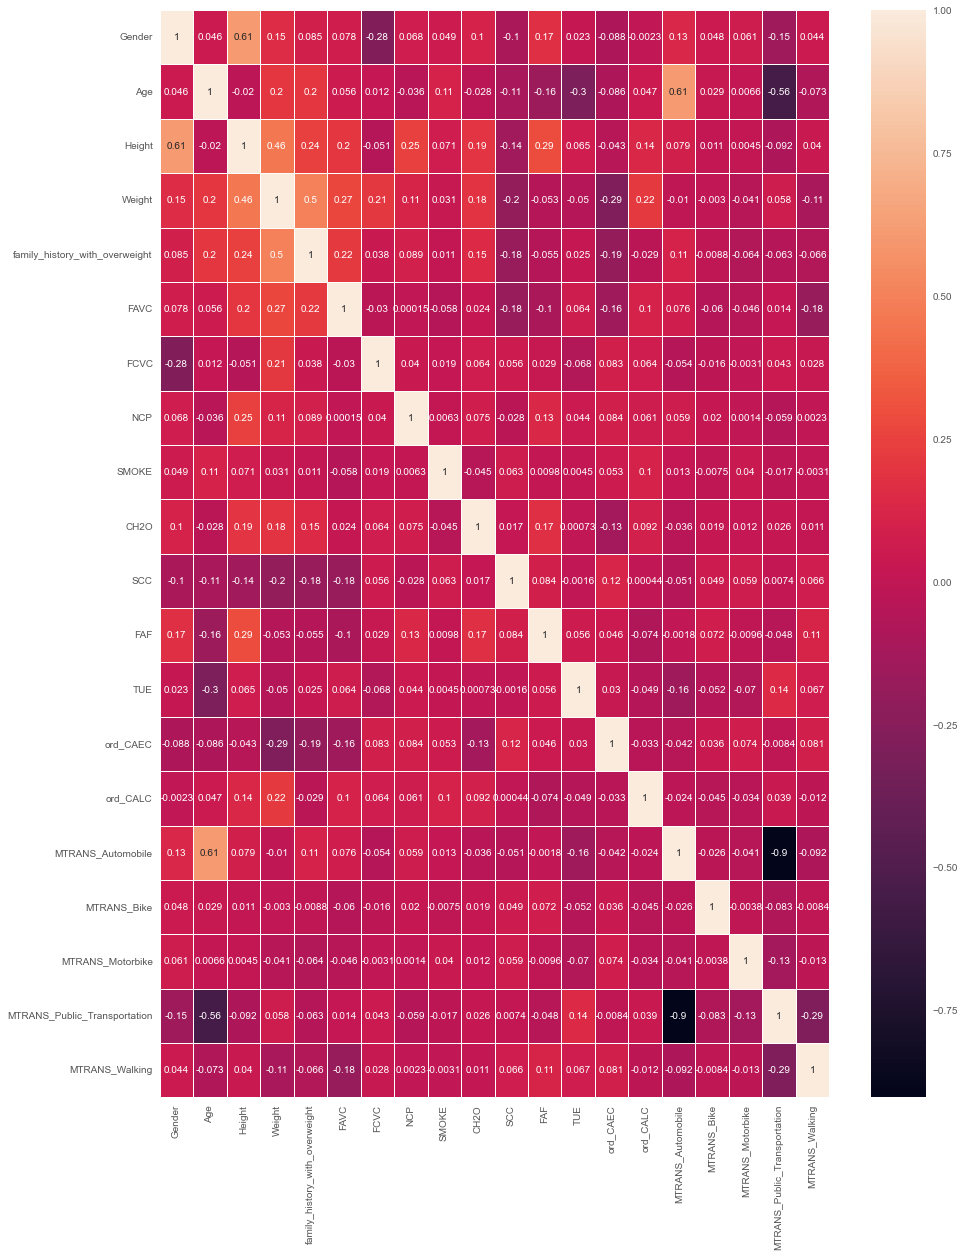

In [32]:
_=sns.heatmap(X_train.corr(), annot = True,linewidths=.5)

Some of the transportation one-hot variables are highly correlated but that is to be expected. Generally, the variables looks decoupled.

In [34]:
# Model Selection

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, precision_score,\
recall_score,f1_score,confusion_matrix, plot_confusion_matrix


mdls = {'lr': LogisticRegression(multi_class='ovr'),
        'svc': SVC(decision_function_shape='ovr'),
        'rf': RandomForestClassifier(n_jobs=-1),
        'xgb': XGBClassifier(n_jobs=-1),
        }

prms = {'lr': {'C': np.logspace(-4,4,9),
              'penalty': ['l1','l2']},
        'svc': {'C': np.logspace(-4,4,9)},
        'rf': {'n_estimators': [2**i for i in range(3,8)],
               'max_depth':  [8,16,32,64,None]},
        'xgb': {'min_child_weight': [4,5],
                'gamma': [i/10.0 for i in range(3,6)],
                'subsample': [i/10.0 for i in range(6,11)],
                'colsample_bytree': [i/10.0 for i in range(6,11)],
                'max_depth': [2,3,4]}
        }


In [53]:
import joblib

# Define the models and their respective parameters
models = {
    'lr': LogisticRegression(multi_class='ovr'),
    'svc': SVC(decision_function_shape='ovr'),
    'rf': RandomForestClassifier(n_jobs=-1),
    'xgb': XGBClassifier(n_jobs=-1)
}

parameters = {
    'lr': {'C': [10**i for i in range(-4, 5)], 'penalty': ['l1', 'l2']},
    'svc': {'C': [10**i for i in range(-4, 5)]},
    'rf': {'n_estimators': [2**i for i in range(3, 8)],
           'max_depth': [8, 16, 32, 64, None]},
    'xgb': {'min_child_weight': [4], # computtion power is taking too much so i skip these many param
            'gamma': [0.4],
            'subsample': [1.0],
            'colsample_bytree': [0.9],
            'max_depth': [ 4]}
}
    

# Create a dictionary to store the best estimators
best_estimators = {}

# Perform model training and hyperparameter tuning
for model_name, model in models.items():
    params = parameters[model_name]
    
    # Create a GridSearchCV object to search for the best parameters
    grid_search = GridSearchCV(model, params, scoring='f1_macro', cv=5, n_jobs=-1)
    
    # Fit the model on the training data
    grid_search.fit(X_train, y_train)
    
    # Get the best model with the tuned hyperparameters
    best_estimator = grid_search.best_estimator_
    
    # Store the best estimator in the dictionary
    best_estimators[model_name] = best_estimator

# Save the best_estimators dictionary to a file
joblib.dump(best_estimators, 'best_estimators_dict.joblib')


['best_estimators_dict.joblib']

In [54]:
# Load trained models
best_estimators = joblib.load('best_estimators_dict.joblib')

In [55]:
evaluate = ['rf','xgb']
y_test_str = ord_encoders['NObeyesdad'].inverse_transform(np.asarray(y_test).reshape(-1,1))
for mdl in evaluate:
    y_p = ord_encoders['NObeyesdad'].inverse_transform(best_estimators[mdl].predict(X_test).reshape(-1,1))
    print('Classification Report for {}'.format(mdl))
    print(classification_report(y_test_str,y_p))
    print()

Classification Report for rf
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.96      0.96        56
      Normal_Weight       0.88      0.90      0.89        62
     Obesity_Type_I       0.99      0.95      0.97        78
    Obesity_Type_II       0.97      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.91      0.89      0.90        56
Overweight_Level_II       0.94      0.96      0.95        50

           accuracy                           0.95       423
          macro avg       0.95      0.95      0.95       423
       weighted avg       0.95      0.95      0.95       423


Classification Report for xgb
                     precision    recall  f1-score   support

Insufficient_Weight       0.92      1.00      0.96        56
      Normal_Weight       0.96      0.87      0.92        62
     Obesity_Type_I       0.97      0.95      0.96        78
    Obesity_Type_II  

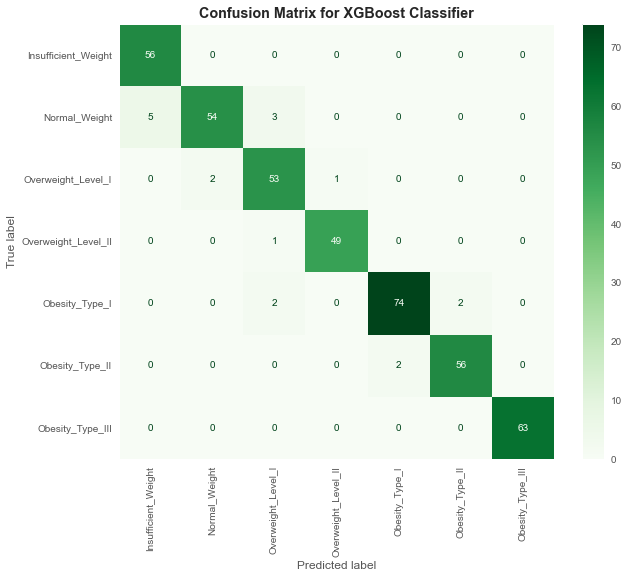

In [56]:
# Confusion Matrix
labels = list(ord_encoders['NObeyesdad'].categories_[0]) # get category labels

# plot heatmap
f,ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10,8))
plot_confusion_matrix(best_estimators['xgb'],X_test,y_test,
                      xticks_rotation='vertical',display_labels=labels,
                      cmap=plt.cm.Greens, ax = ax
                     )
ax.grid(False)
_ = ax.set_title('Confusion Matrix for XGBoost Classifier',
            fontweight='bold')

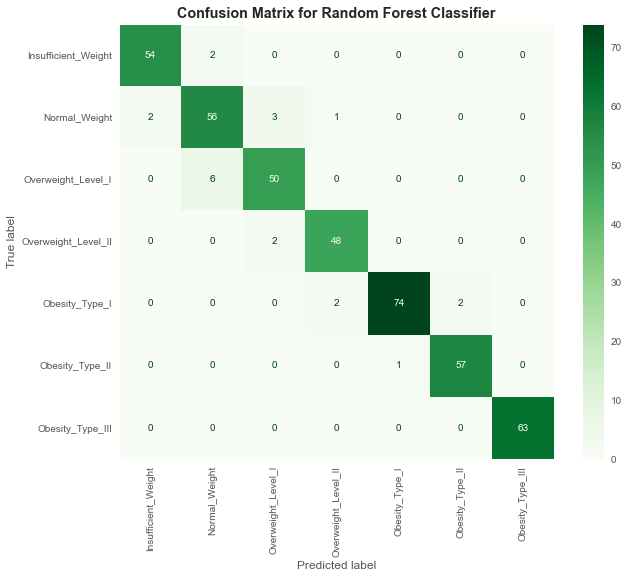

In [57]:
# plot heatmap
f,ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10,8))
plot_confusion_matrix(best_estimators['rf'],X_test,y_test,
                      xticks_rotation='vertical',display_labels=labels,
                      cmap=plt.cm.Greens, ax = ax
                     )
ax.grid(False)
_ = ax.set_title('Confusion Matrix for Random Forest Classifier',
            fontweight='bold')

### this is complete model tarining with tuning we observ xgb be is best for this dataset 